# 추천시스템의 유형

- 콘텐츠 기반 피러링 방식과, 협업 필터링 방식으로 나뉜다. 협업 필터링 방식은 최근접 이웃 협업 필터링과 잠재 요인 협업 필터링으로 나뉜다.
- 대부분의 온라인 스토어에서 잠재 요인 협업 필터링 기반의 추천 시스템을 적용하고 있다.

# 콘텐츠 기반 필터링 추천 시스템

- 사용자가 특정한 아이템을 매우 선호하는 경우, 그 아이템과 비슷한 콘텐츠를 가진 다른 아이템을 추천하는 방식

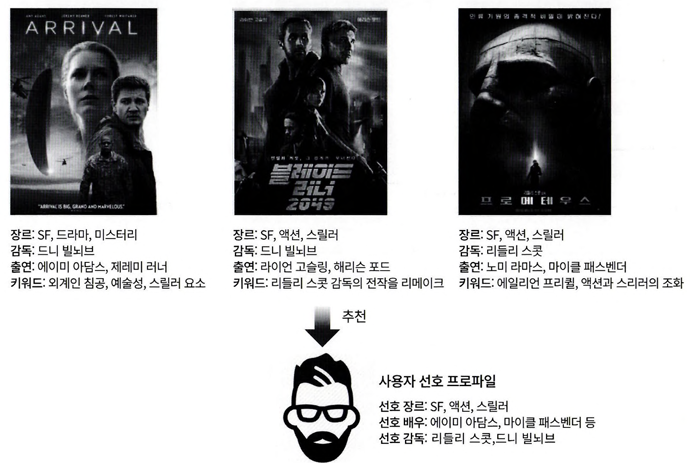

# 최근접 이웃 협업 필터링

- **협업 필터링**: 사용자가 아이템에 매긴 평점 정보나 상품 구매 이력과 같은 사용자 행동 양식만을 기반으로 추천을 수행하는 것
- 협업 필터링의 주요 목표는 사용자-아이템 평점 매트릭스와 같은 축적된 사용자 행동 데이터를 기반으로 사용자가 아직 평가하지 않은 아이템을 예측 평가하는 것.


- 협업 필터링 기반의 추천 시스템은 최근접 이웃 방식과 잠재 요인 방식으로 나뉘고, 두 방식 모두 사용자-아이템 평점 행렬 데이터에 의존
- 행렬의 행은 사용자, 열은 개별 아이템, 개별 값은 평점
- 만약 데이터가 레코드 레벨 형태라면, pivot_table()과 같은 함수를 이용해 사용자-아이템 평점 행렬로 변경

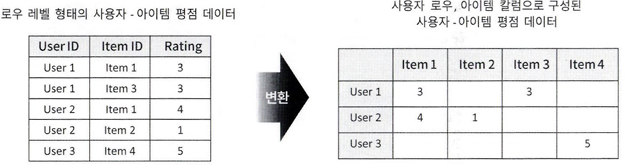

- 사용자-아이템 행렬은 희소행렬 형태
- 최근접 이웃 협업 필터링은 사용자 기반과 아이템 기반으로 나뉠 수 있다.
- **사용자 기반 최근접 이웃 방식**은 특정 사용자와 유사한 다른 사용자를 Top-N으로 선정해 이 Top-N 사용자가 좋아하는 아이템을 추천하는 방식

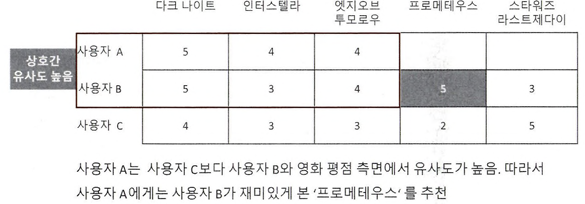

- **아이템 기반 최근접 이웃 방식**은 사용자가 그 아이템을 좋아하는지/싫어하는지의 평가 척도가 유사한 아이템을 추천하는 기준이 되는 알고리즘
- 아래표에서 다크 나이트를 매우 좋아하는 사용자 D에게 아이템 기반 협업 필터링은 아직 관람하지 않은 두개의 영화 중 프로메테우스를 추천

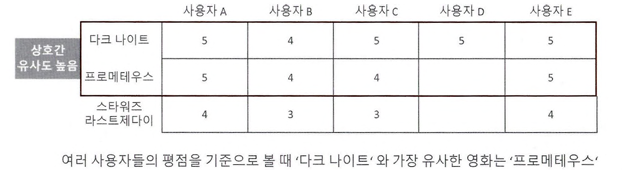

-> 일반적으로 사용자 기반보다 아이템 기반 협업 필터링이 정확도가 더 높음. 따라서 최근접 이웃 필터링은 대부분 아이템 기반의 알고리즘을 적용‼️

# 잠재 요인 협업 필터링

- 사용자-아이템 평점 매트릭스 속에 숨어있는 잠재 요인을 추출해 추천 예측을 할 수 있게 하는 기법
- 대규모 다차원 행렬을 SVD와 같은 차원 감소 기법으로 분해하는 과정에서 잠재 요인을 추출하는데, 이러한 기법을 행렬 분해라고 한다.

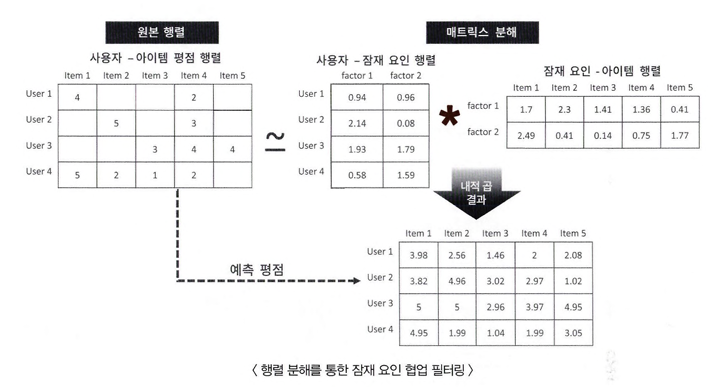

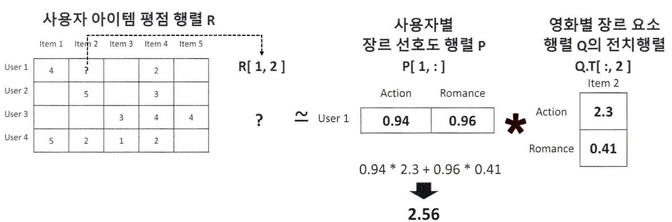

## 행렬 분해의 이해

- 다차원의 매트릭스를 저차원 매트릭스로 분해하는 기법으로서 대표적으로 SVD, NMF 등이 있다.

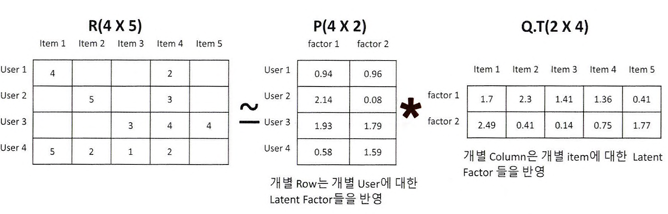

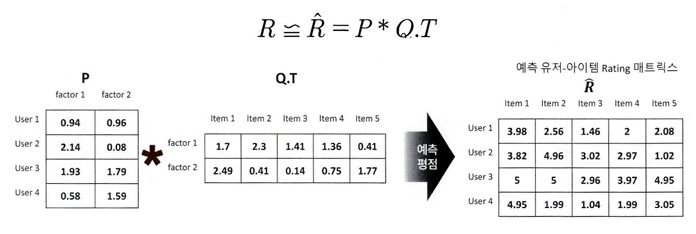

- R 행렬을 어떻게 P와 Q 행렬로 분해할까? 행렬 분해는 보통 SVD를 이용하지만, SVD는 NaN이 없는 행렬에만 적용할 수 있다. R 행렬에는 평점이 되지 않은 많은 널 값이 있기 때문에 P와 Q 행렬을 일반적인 SVD 방식으로 분해할 수 없다. 이러한 경우 **확률적 경사 하강법**을 이용해 SVD를 수행한다.

## 확률적 경사 하강법을 이용한 행렬 분해

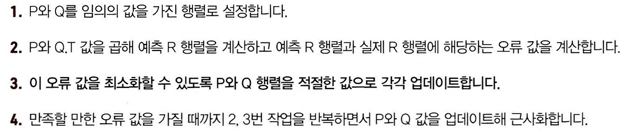

- 아래는 분해하려는 원본 행렬 R을 P와 Q로 분해한 뒤 다시 P와 Q.T의 내적으로 예측 행렬을 만드는 예제 (Q.T는 transpose of Q)

In [3]:
import numpy as np

# 원본 행렬 R 생성, 분해 행렬 P와 Q 초기화, 잠재요인 K=3으로 설정

R = np.array([[4, np.nan, np.nan, 2, np.nan],
              [np.nan, 5, np.nan, 3, 1],
              [np.nan, np.nan, 3, 4, 4],
              [5, 2, 1, 2, np.nan]])
num_users, num_items = R.shape
K=3

# P와 Q 행렬의 크기를 지정하고 정규분포를 가진 임의의 값으로 입력
np.random.seed(1)
P = np.random.normal(scale=1./K, size=(num_users, K))
Q = np.random.normal(scale=1./K, size=(num_items, K))

In [4]:
## 실제 R 행렬과 예측 행렬의 오차를 구하는 get_rmse() 함수를 만들어 보기 ##

from sklearn.metrics import mean_squared_error

def get_rmse(R, P, Q, non_zeros):
  error = 0
  # 두 개의 분해된 행렬 P와 Q.T의 내적으로 예측 R 행렬 생성
  full_pred_matrix = np.dot(P, Q.T)

  # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출해 실제 R 행렬과 예측 행렬이 RMSE 추출
  x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
  y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
  R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
  full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
  mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
  rmse = np.sqrt(mse)

  return rmse


In [5]:
# R>0인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장
non_zeros = [(i,j, R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j] > 0]

steps = 1000
learning_rate=0.01
r_lamda=0.01

# SGD 기법으로 P와 Q 매트릭스를 계속 업데이트
for step in range(steps):
  for i,j,r in non_zeros:
    # 실제 값과 예측 값의 차이인 오류값 구함
    eij = r - np.dot(P[i,:], Q[j,:].T)
    # Regulation을 반영한 SGD 업데이트 공식 적용
    P[i,:] = P[i,:] + learning_rate*(eij * Q[j,:] - r_lamda*P[i,:])
    Q[j,:] = Q[j,:] + learning_rate*(eij * P[i,:] - r_lamda*Q[j,:])

    rmse = get_rmse(R, P, Q, non_zeros)
    if (step % 50) == 0:
      print("### iteration step : ", step, " rmse : ", rmse)


### iteration step :  0  rmse :  3.261355059488935
### iteration step :  0  rmse :  3.26040057174686
### iteration step :  0  rmse :  3.253984404542389
### iteration step :  0  rmse :  3.2521583839863624
### iteration step :  0  rmse :  3.252335303789125
### iteration step :  0  rmse :  3.251072196430487
### iteration step :  0  rmse :  3.2492449982564864
### iteration step :  0  rmse :  3.247416477570409
### iteration step :  0  rmse :  3.241926055455223
### iteration step :  0  rmse :  3.2400454107613084
### iteration step :  0  rmse :  3.240166740749792
### iteration step :  0  rmse :  3.2388050277987723
### iteration step :  50  rmse :  0.5003190892212748
### iteration step :  50  rmse :  0.5001616291326989
### iteration step :  50  rmse :  0.49899601202578087
### iteration step :  50  rmse :  0.4988483450145831
### iteration step :  50  rmse :  0.49895189256631756
### iteration step :  50  rmse :  0.49833236830090993
### iteration step :  50  rmse :  0.4984148489378701
### iterati

In [6]:
pred_matrix = np.dot(P, Q.T)
print('예측 행렬:\n', np.round(pred_matrix, 3))

예측 행렬:
 [[3.991 0.897 1.306 2.002 1.663]
 [6.696 4.978 0.979 2.981 1.003]
 [6.677 0.391 2.987 3.977 3.986]
 [4.968 2.005 1.006 2.017 1.14 ]]


- > 원본 행렬과 비교해 널이 아닌 값은 큰 차이가 나지 않으며 널인 값은 새로운 예측값으로 채워짐.